In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

1) Read in Data

In [2]:
m3 = pd.read_csv('Method3Final.csv')
m3 = m3.drop(['Unnamed: 0'], axis=1)
datanolabels = m3[['Hospital overall rating','Surgery','Doctors','Service/Staff','Childcare','Recovery','ER','Facility','Diagnosis','Comfort', 'Nurses']]

In [3]:
datanolabels[datanolabels['Hospital overall rating'] == 'Not Available'] 
datanolabels = datanolabels.drop([14,15,24,32,33,51,52,53,84,113,115,123,125,129,132,156,158])

2) Plotted Dendrogram

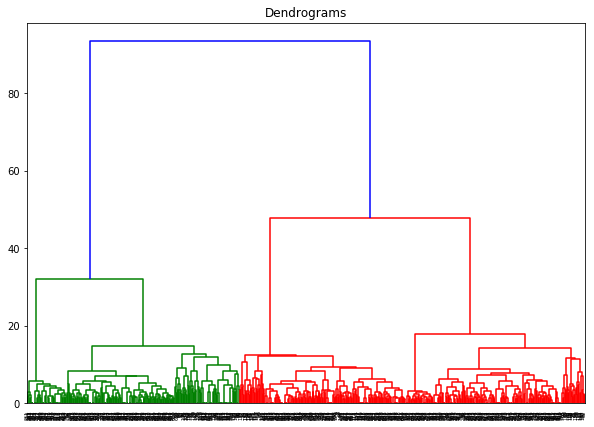

In [4]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(datanolabels, method='ward'))

3) Create line across largest distance of each cluster (between the blue line)

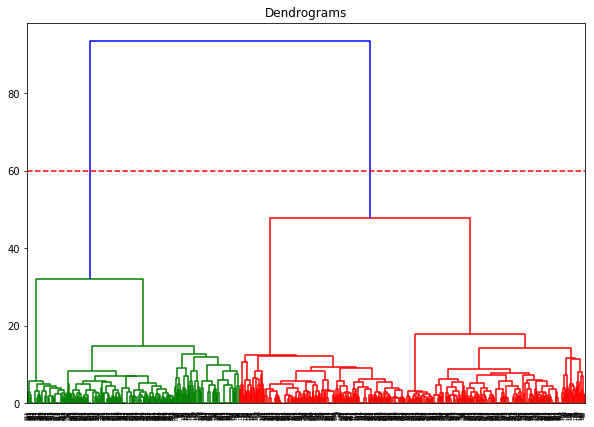

In [5]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(datanolabels, method='ward'))
plt.axhline(y=60, color='r', linestyle='--')


4) Assign points to array of zeroes and ones where 0 represents the points that belong to the first cluster and 1 represents points in the second cluster. Let’s now visualize the two clusters:

In [6]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
arr = cluster.fit_predict(datanolabels)
#arr

5) Plot clusters

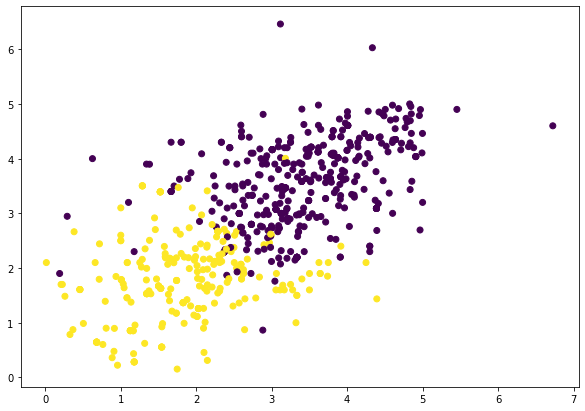

In [7]:
plt.figure(figsize=(10, 7))  
ax = plt.scatter(datanolabels['Nurses'], datanolabels['Doctors'], 
            c=cluster.labels_)
#ax.plot(datanolabels['Nurses'], datanolabels['Childcare'], label='$y = numbers')
#ax.plot(x, y2, label='$y2 = other numbers')
#plt.title('Legend inside')
plt.show()

# Created Heirarchical Heatmaps with Seaborn

### Top 50 hospitals in CA

In [8]:
CA = m3.loc[m3['State'].isin(['CA'])]
CAnolabel = CA[['Hospital overall rating','Surgery','Doctors','Service/Staff','Childcare','Recovery','ER','Facility','Diagnosis','Comfort', 'Nurses']]
sortCA = CAnolabel.sort_values(by=['Hospital overall rating'], ascending=False)
top50CA = sortCA[:51]
top50CA = top50CA.drop(columns=['Hospital overall rating'])
#sortCA

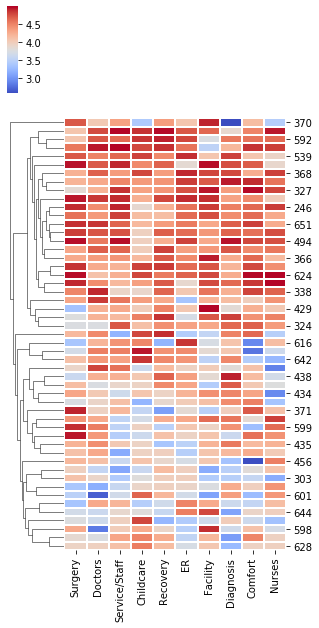

In [9]:
sns.clustermap(top50CA,col_cluster = False,cmap = 'coolwarm', linewidths = 1, figsize=(5,10))

### Top 50 hospitals in OR

In [10]:
OR = m3.loc[m3['State'].isin(['OR'])]
ORnolabel = OR[['Hospital overall rating','Surgery','Doctors','Service/Staff','Childcare','Recovery','ER','Facility','Diagnosis','Comfort', 'Nurses']]
sortOR = ORnolabel.sort_values(by=['Hospital overall rating'], ascending=False)
top50OR = sortOR[:51]
top50OR = top50OR.drop(columns=['Hospital overall rating'])

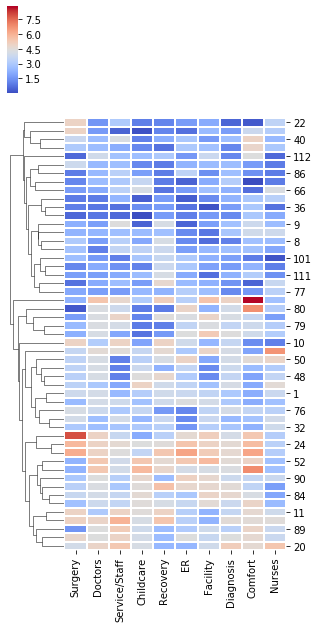

In [11]:
sns.clustermap(top50OR,col_cluster = False,cmap = 'coolwarm', linewidths = 1, figsize=(5,10))

### Data shows that hopitals in CA are higher rated than in Oregon